In [1]:
from samalg import SAM
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scanpy as sc

In [2]:
samsporo=SAM()

In [8]:
samsporo.load_data('sporocysts3.counts.csv')

In [9]:
samsporo.preprocess_data()

In [10]:
samsporo.run(seed=20)

RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8664754161412229
Iteration: 2, Convergence: 0.014849898113939216
Computing the UMAP embedding...
Elapsed time: 3.108048915863037 seconds


<AxesSubplot:>

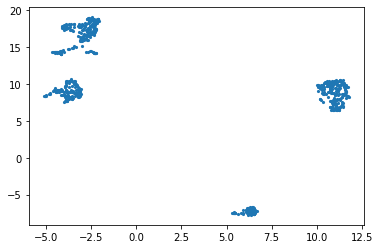

In [11]:
samsporo.scatter()

In [12]:
samsporo.dispersion_ranking_NN(save_avgs=True)

array([0.        , 0.18621817, 0.20138919, ..., 0.42901166, 0.21801198,
       0.33420182])

In [13]:
samsporo.clustering(method = 'leiden')

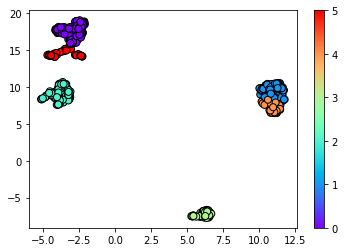

In [14]:
samsporo.scatter(c = 'leiden_clusters', linewidth = 1, s = 50, edgecolor='black'
            , colorbar=True)
plt.savefig('samsporo3.seed20.leiden_clusters2.pdf', dpi=500)

In [15]:
samsporoadata = samsporo.adata

In [16]:
m = pd.read_csv("/Users/ta13/R_tutorials/sporocysts/meta_sporos.csv")
samsporoadata.obs = m

In [17]:
colors_proto  = np.array(["#ffb703","#007aaa","#107E7D","#c40c18","#fb8500","#7851a9","#00325b","#452e60","#c4b7cb"])
samsporoadata.uns['ident.names_colors'] = colors_proto

/Users/ta13/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'orig.ident' as categorical
/Users/ta13/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'reasonForFail' as categorical
/Users/ta13/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version.

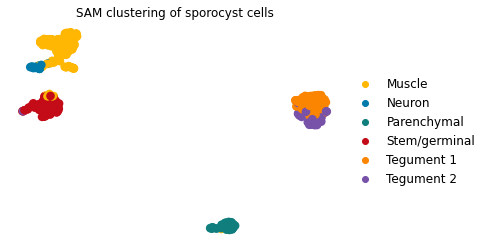

In [18]:
sc.pl.umap(samsporoadata, color='ident.names', add_outline=False, legend_loc='right margin',
               legend_fontsize=12, legend_fontoutline=2,frameon=False, size=300,
               title='SAM clustering of sporocyst cells', save='sporo3_.seed20).seurat_clusters.pdf')

In [19]:
samsporo.clustering(method = 'kmeans')

(array([5, 1, 5, 3, 3, 2, 4, 0, 2, 3, 0, 5, 5, 0, 5, 0, 2, 1, 5, 4, 4, 2,
        2, 5, 5, 1, 0, 0, 2, 0, 1, 4, 5, 5, 1, 0, 0, 4, 4, 5, 1, 4, 5, 4,
        5, 5, 2, 1, 1, 2, 4, 0, 1, 4, 0, 2, 1, 3, 5, 3, 3, 3, 5, 3, 5, 5,
        4, 3, 5, 0, 1, 0, 1, 3, 0, 5, 0, 2, 4, 2, 0, 0, 5, 1, 1, 5, 1, 5,
        0, 5, 1, 2, 0, 5, 2, 2, 1, 5, 1, 0, 5, 4, 5, 3, 5, 5, 5, 0, 5, 2,
        2, 1, 5, 2, 4, 4, 0, 4, 4, 2, 0, 0, 2, 1, 5, 1, 1, 1, 4, 0, 0, 1,
        4, 0, 0, 2, 2, 2, 0, 3, 0, 1, 0, 2, 4, 2, 5, 5, 0, 1, 0, 0, 4, 1,
        2, 1, 5, 0, 0, 3, 2, 4, 1, 2, 5, 5, 5, 4, 5, 2, 0, 1, 5, 3, 2, 2,
        0, 2, 4, 5, 5, 3, 3, 3, 1, 4, 0, 4, 4, 5, 0, 3, 3, 2, 2, 5, 3, 0,
        1, 1, 1, 1, 4, 3, 2, 2, 3, 1, 5, 5, 5, 2, 5, 0, 5, 2, 2, 1, 1, 0,
        0, 1, 5, 5, 3, 2, 4, 2, 1, 1, 3, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2,
        4, 4, 5, 1, 2, 2, 0, 1, 3, 1, 3, 0, 0, 5, 0, 2, 0, 0, 2, 5, 4, 1,
        1, 1, 1, 1, 1, 0, 0, 4, 1, 4, 0, 2, 0, 4, 1, 4, 2, 5, 3, 1, 2, 1,
        2, 0, 0, 4, 4, 2, 4, 4, 3, 0, 

Key does not exist in `obs`.


IndexError: index 0 is out of bounds for axis 0 with size 0

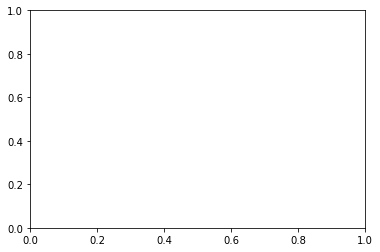

In [9]:
samsporo.scatter(c = 'kmeans_clusters', linewidth = 1, s = 50, edgecolor='black'
            , colorbar=True)
plt.savefig('samsporo3.seed20.kmeans_clusters2.pdf', dpi=500)

In [13]:
print(samsporo.adata.uns['ranked_genes'][:20])

['Smp-330600' 'Smp-302860' 'Smp-307020' 'Smp-201060' 'Smp-327370'
 'Smp-331630' 'Smp-032670' 'Smp-056460' 'Smp-203090' 'Smp-085540'
 'Smp-323640' 'Smp-329690' 'Smp-329780' 'Smp-344440' 'Smp-173350'
 'Smp-341790' 'Smp-312630' 'Smp-200180' 'Smp-327540' 'Smp-324300']


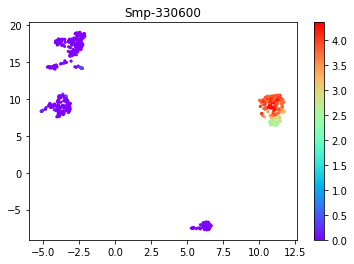

In [14]:
samsporo.show_gene_expression(samsporo.adata.uns['ranked_genes'][0]);
plt.savefig('samsporo3.seed20.top0.pdf', dpi=500)

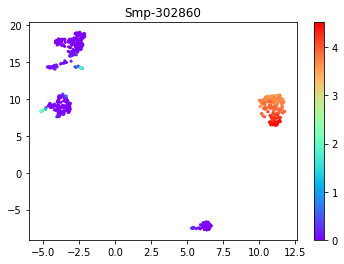

In [15]:
samsporo.show_gene_expression(samsporo.adata.uns['ranked_genes'][1]);
plt.savefig('samsporo3.seed20.top1.pdf', dpi=500)

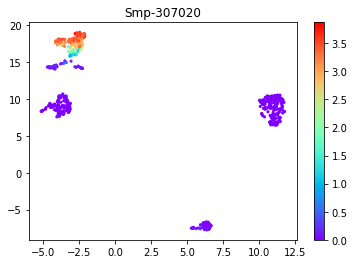

In [16]:
samsporo.show_gene_expression(samsporo.adata.uns['ranked_genes'][2]);
plt.savefig('samsporo3.seed20.top2.pdf', dpi=500)

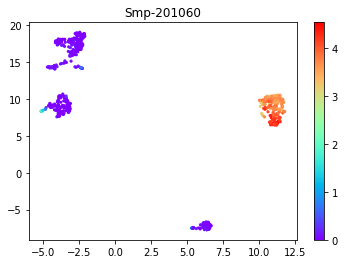

In [17]:
samsporo.show_gene_expression(samsporo.adata.uns['ranked_genes'][3]);
plt.savefig('samsporo3.seed20.top3.pdf', dpi=500)

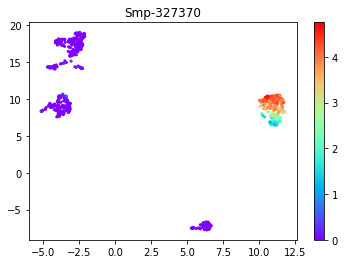

In [18]:
samsporo.show_gene_expression(samsporo.adata.uns['ranked_genes'][4]);
plt.savefig('samsporo3.seed20.top4.pdf', dpi=500)

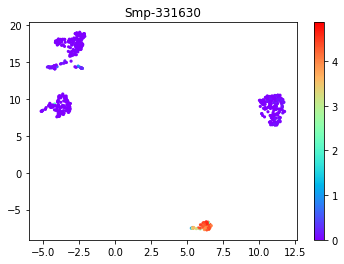

In [19]:
samsporo.show_gene_expression(samsporo.adata.uns['ranked_genes'][5]);
plt.savefig('samsporo3.seed20.top5.pdf', dpi=500)

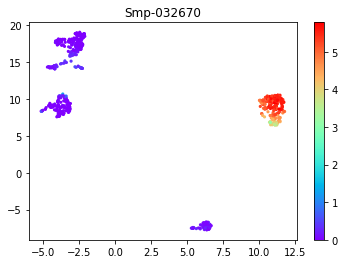

In [20]:
samsporo.show_gene_expression(samsporo.adata.uns['ranked_genes'][6]);
plt.savefig('samsporo3.seed20.top6.pdf', dpi=500)

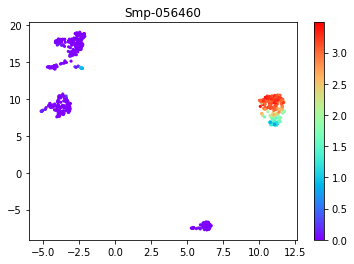

In [21]:
samsporo.show_gene_expression(samsporo.adata.uns['ranked_genes'][7]);
plt.savefig('samsporo3.seed20.top7.pdf', dpi=500)

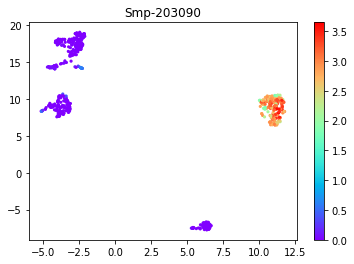

In [22]:
samsporo.show_gene_expression(samsporo.adata.uns['ranked_genes'][8]);
plt.savefig('samsporo3.seed20.top8.pdf', dpi=500)

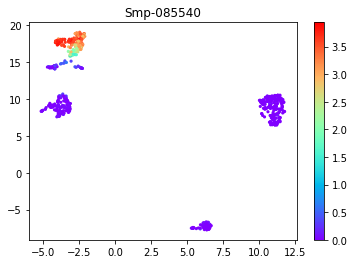

In [23]:
samsporo.show_gene_expression(samsporo.adata.uns['ranked_genes'][9]);
plt.savefig('samsporo3.seed20.top9.pdf', dpi=500)

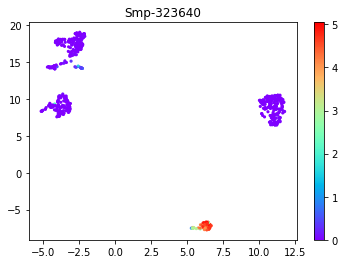

In [24]:
samsporo.show_gene_expression(samsporo.adata.uns['ranked_genes'][10]);
plt.savefig('samsporo3.seed20.top10.pdf', dpi=500)

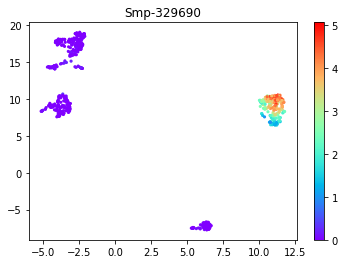

In [25]:
samsporo.show_gene_expression(samsporo.adata.uns['ranked_genes'][11]);
plt.savefig('samsporo3.seed20.top11.pdf', dpi=500)

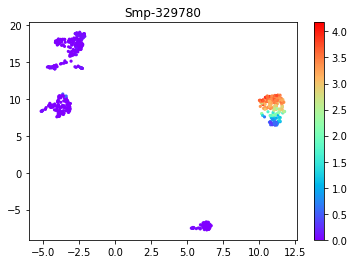

In [26]:
samsporo.show_gene_expression(samsporo.adata.uns['ranked_genes'][12]);
plt.savefig('samsporo3.seed20.top12.pdf', dpi=500)

In [27]:
markers_clust0, marker_scores_clust0 = samsporo.identify_marker_genes_rf(labels = 'leiden_clusters', clusters = [0])

In [28]:
first_value = list(markers_clust0.values())[0]
first_value
first_value[:10]

array(['Smp-307020', 'Smp-179810', 'Smp-085540', 'Smp-031770',
       'Smp-087250', 'Smp-078690', 'Smp-306600', 'Smp-342190',
       'Smp-307010', 'Smp-045220'], dtype='<U12')

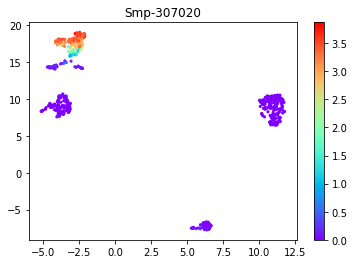

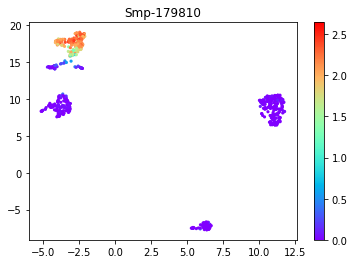

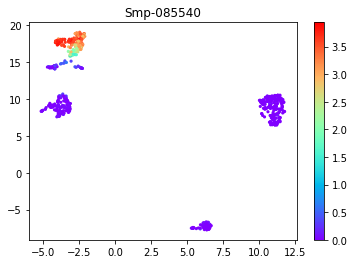

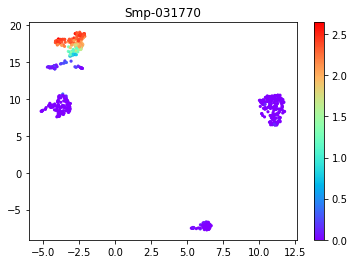

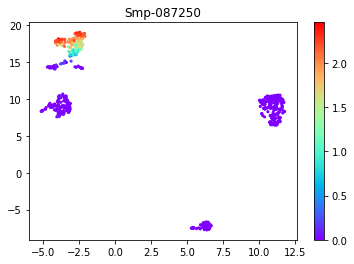

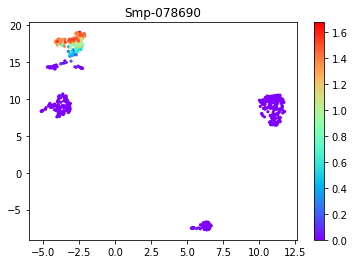

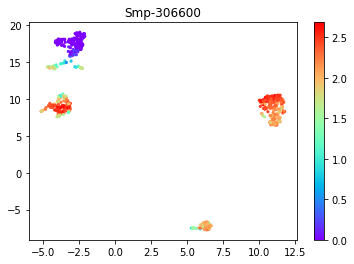

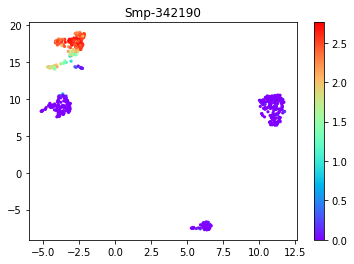

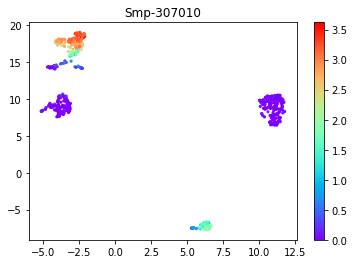

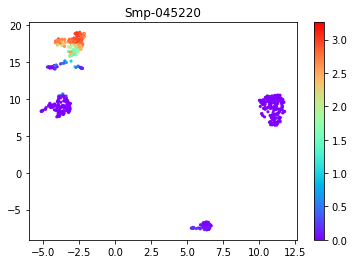

In [29]:
for i in range(10):
    samsporo.show_gene_expression(first_value[i])

In [30]:
markers_clust1, marker_scores_clust1 = samsporo.identify_marker_genes_rf(labels = 'leiden_clusters', clusters = [1])

In [31]:
first_value = list(markers_clust1.values())[0]
first_value
first_value[:10]

array(['Smp-348500', 'Smp-328770', 'Smp-330600', 'Smp-153370',
       'Smp-344440', 'Smp-303290', 'Smp-056460', 'Smp-102020',
       'Smp-327370', 'Smp-329700'], dtype='<U12')

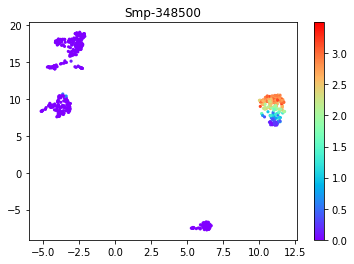

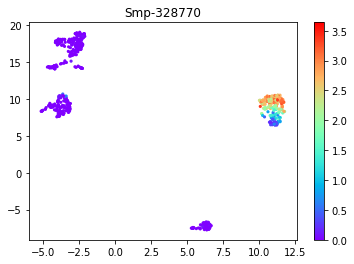

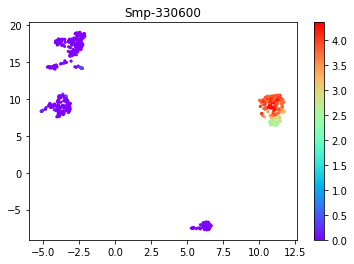

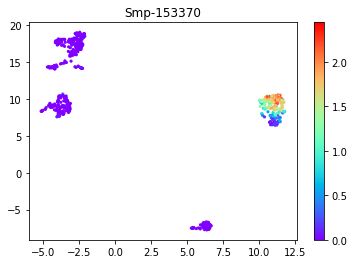

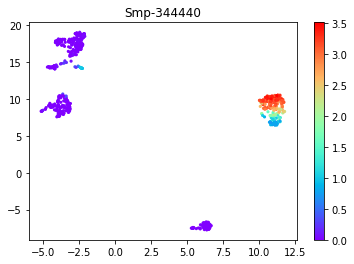

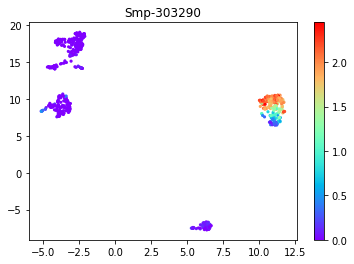

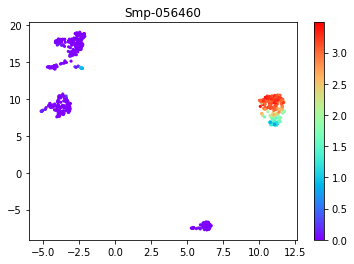

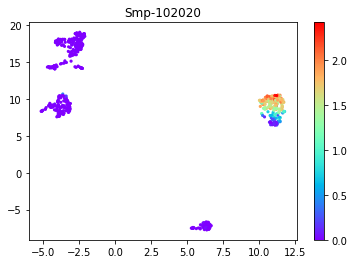

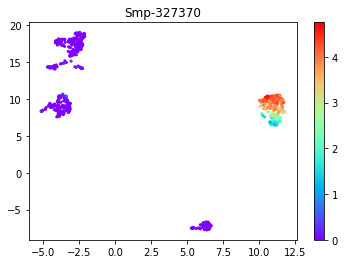

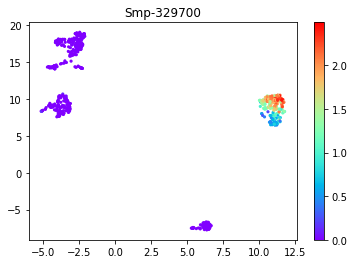

In [32]:
for i in range(10):
    samsporo.show_gene_expression(first_value[i])

In [33]:
markers_clust2, marker_scores_clust2 = samsporo.identify_marker_genes_rf(labels = 'leiden_clusters', clusters = [2])

In [34]:
first_value = list(markers_clust2.values())[0]
first_value
first_value[:10]

array(['Smp-086860', 'Smp-202770', 'Smp-046500', 'Smp-210310',
       'Smp-153790', 'Smp-041980', 'Smp-014650', 'Smp-009690',
       'Smp-203630', 'Smp-024850'], dtype='<U12')

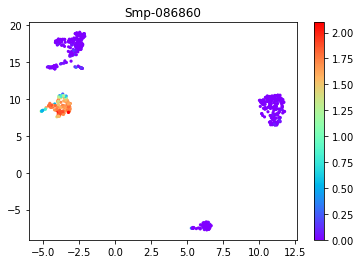

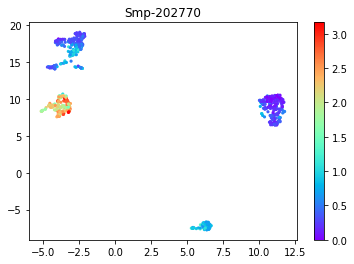

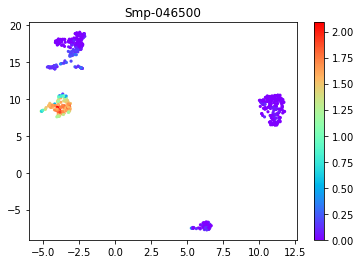

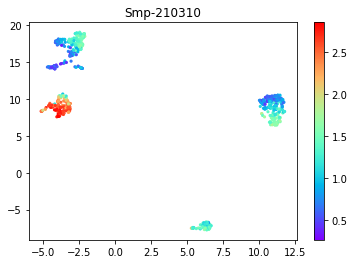

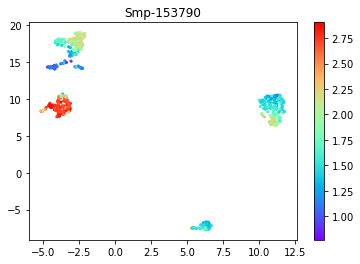

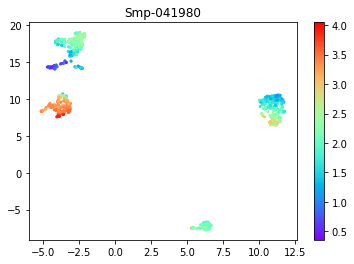

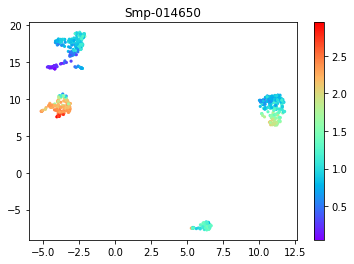

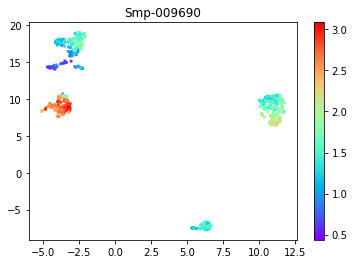

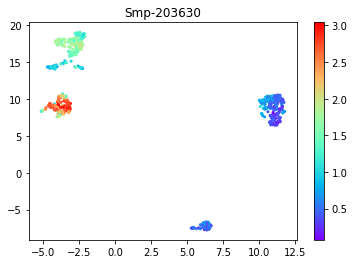

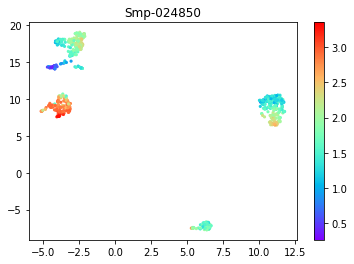

In [35]:
for i in range(10):
    samsporo.show_gene_expression(first_value[i])

In [36]:
markers_clust3, marker_scores_clust3 = samsporo.identify_marker_genes_rf(labels = 'leiden_clusters', clusters = [3])

In [37]:
first_value = list(markers_clust3.values())[0]
first_value
first_value[:10]

array(['Smp-331630', 'Smp-070780', 'Smp-114660', 'Smp-341790',
       'Smp-331560', 'Smp-011830', 'Smp-095360', 'Smp-311630',
       'Smp-141610', 'Smp-141290'], dtype='<U12')

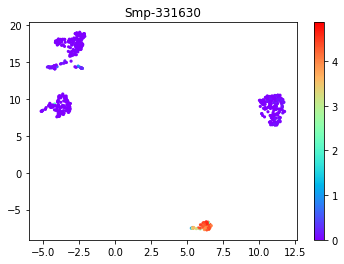

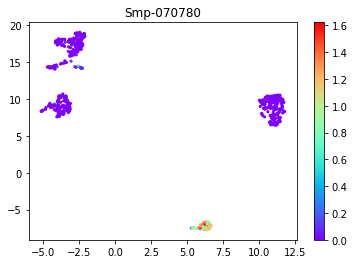

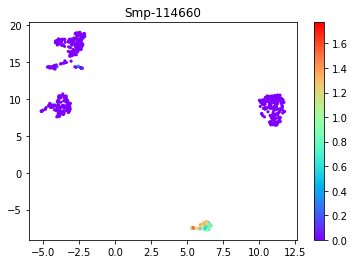

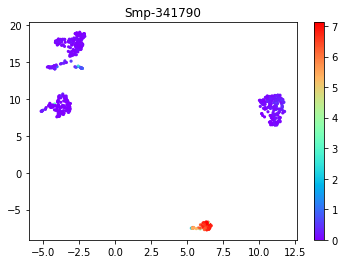

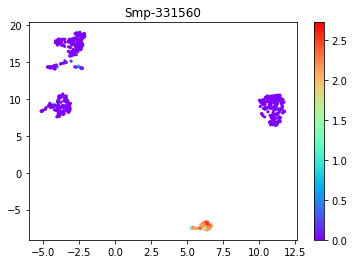

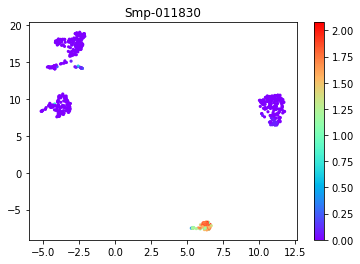

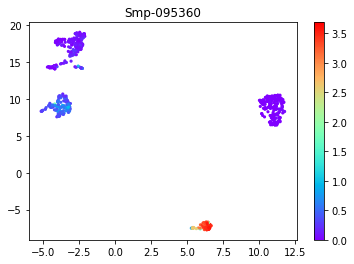

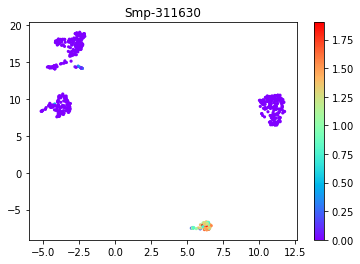

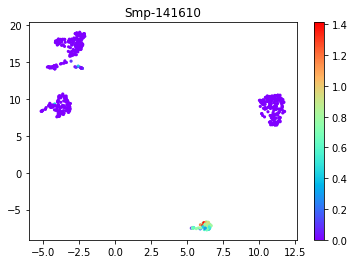

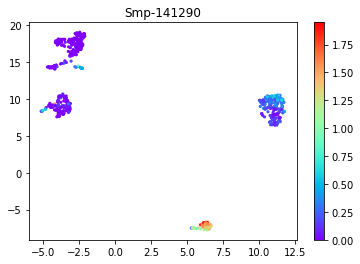

In [38]:
for i in range(10):
    samsporo.show_gene_expression(first_value[i])

In [39]:
markers_clust4, marker_scores_clust4 = samsporo.identify_marker_genes_rf(labels = 'leiden_clusters', clusters = [4])

In [40]:
first_value = list(markers_clust4.values())[0]
first_value
first_value[:10]

array(['Smp-121950', 'Smp-312630', 'Smp-201060', 'Smp-302860',
       'Smp-100040', 'Smp-031310', 'Smp-008070', 'Smp-163710',
       'Smp-320210', 'Smp-173350'], dtype='<U12')

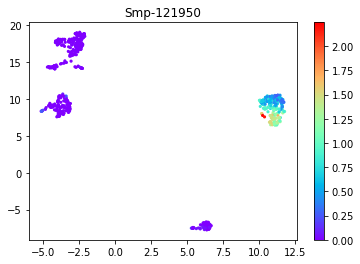

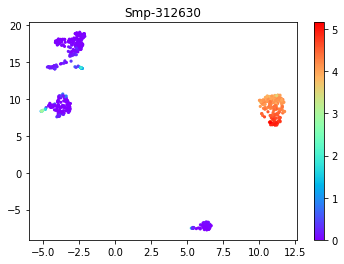

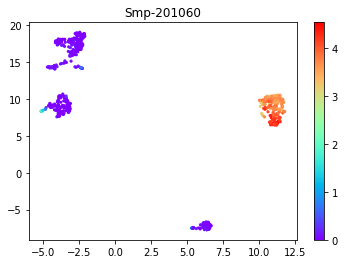

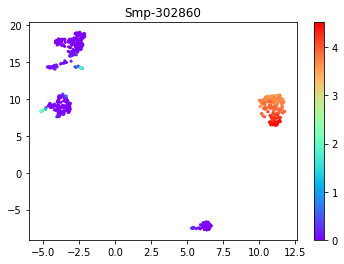

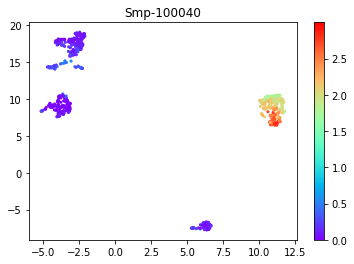

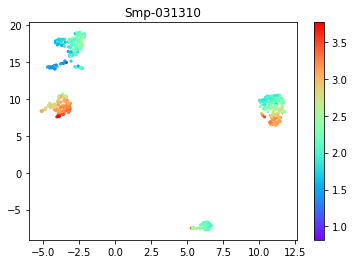

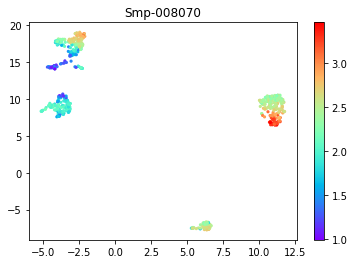

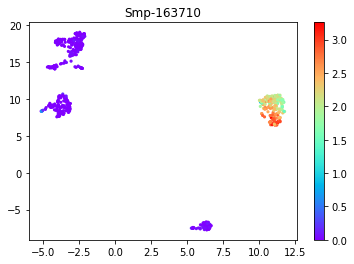

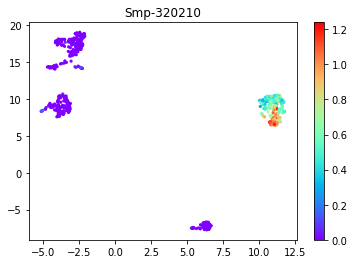

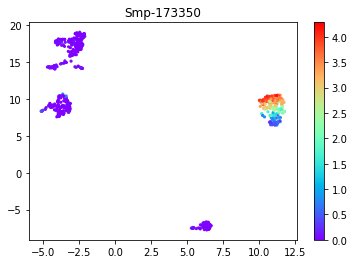

In [41]:
for i in range(10):
    samsporo.show_gene_expression(first_value[i])

In [42]:
markers_clust5, marker_scores_clust5 = samsporo.identify_marker_genes_rf(labels = 'leiden_clusters', clusters = [5])

In [43]:
first_value = list(markers_clust5.values())[0]
first_value
first_value[:10]

array(['Smp-068500', 'Smp-046120', 'Smp-073270', 'Smp-077980',
       'Smp-074000', 'Smp-026230', 'Smp-191970', 'Smp-316660',
       'Smp-004310', 'Smp-091460'], dtype='<U12')

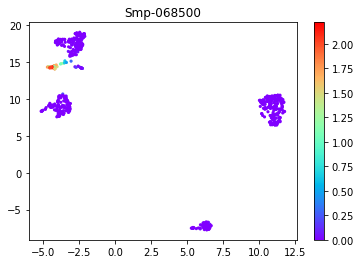

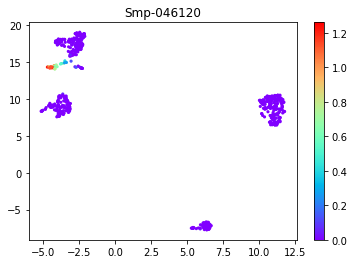

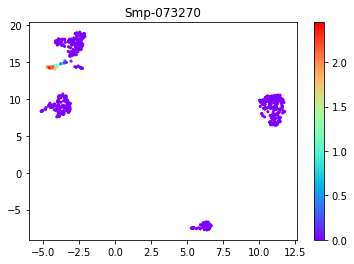

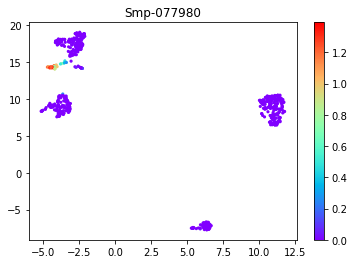

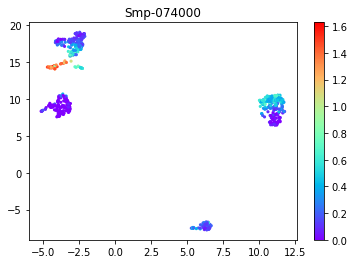

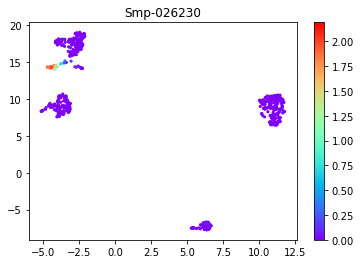

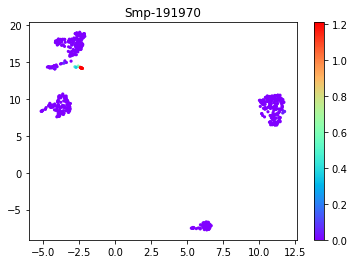

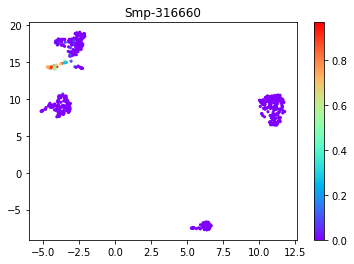

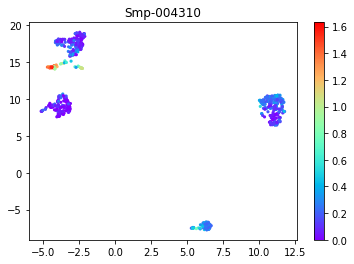

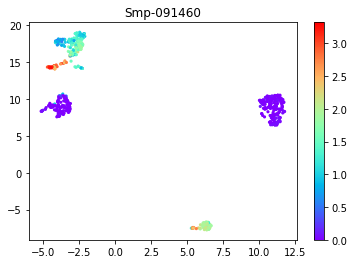

In [44]:
for i in range(10):
    samsporo.show_gene_expression(first_value[i])

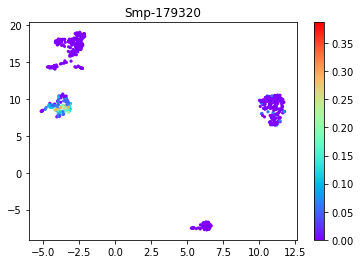

In [12]:
samsporo.show_gene_expression('Smp-179320');
plt.savefig('samsporo3.seed20.ago2-1.Smp-179320.pdf', dpi=500)

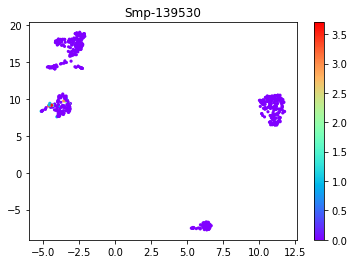

In [13]:
samsporo.show_gene_expression('Smp-139530');
plt.savefig('samsporo3.seed20.p53.Smp-139530.pdf', dpi=500)

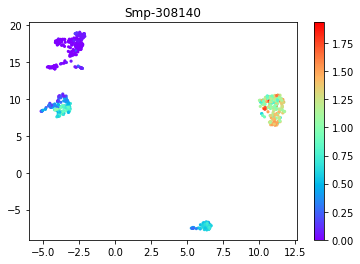

In [22]:
samsporo.show_gene_expression('Smp-308140');
plt.savefig('samsporo3.seed20.uppa.Smp-308140.pdf', dpi=500)

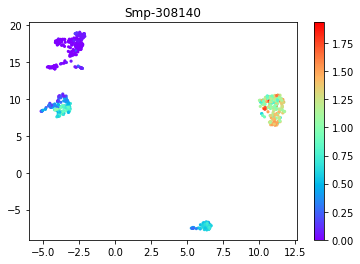

In [23]:
samsporo.show_gene_expression('Smp-308140');

In [9]:
fdSAM = pd.DataFrame(samsporo.adata.uns['ranked_genes'])

In [10]:
fdSAM

,0
0,Smp-330600
1,Smp-302860
2,Smp-307020
3,Smp-201060
4,Smp-327370
...,...
9837,Smp-244220
9838,Smp-244230
9839,Smp-343820
9840,Smp-198170


In [11]:
fdSAM.to_csv('sporo_allCells_allSAMgenes.csv', index=False, header=False)

In [14]:
our_genes_list = ['Smp-046500','Smp-086860','Smp-245030','Smp-074390','Smp-097380','Smp-210630','Smp-063250','Smp-113620', 'Smp-317550','Smp-341240','Smp-179650','Smp-046090']

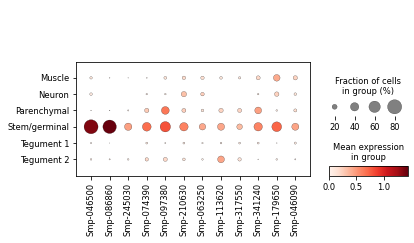

In [15]:
sc.pl.dotplot(samsporoadata, our_genes_list, groupby='ident.names', swap_axes=False, dendrogram=False, save='sporo.seed20.ourTopStemGenes.pdf')

In [20]:
our_teg_genes_list = ['Smp-327370', 'Smp-329780', 'Smp-327540', 'Smp-056460', 'Smp-322230', 'Smp-344440', 'Smp-330600', 'Smp-173350', 'Smp-324300', 
'Smp-348500', 'Smp-328770', 'Smp-329690', 'Smp-328670', 'Smp-328760', 'Smp-337820', 'Smp-102020', 'Smp-330790', 'Smp-327490', 'Smp-203090', 'Smp-153370', 
'Smp-317740', 'Smp-329700', 'Smp-191670', 'Smp-085410', 'Smp-200180', 'Smp-303290', 'Smp-324360', 'Smp-317720', 'Smp-028190', 'Smp-075330', 'Smp-317750',
'Smp-335380', 'Smp-009230', 'Smp-202700', 'Smp-319430', 'Smp-317730', 'Smp-163710', 'Smp-136870', 'Smp-334550', 'Smp-190940', 'Smp-086480', 
'Smp-035260', 'Smp-008400', 'Smp-329430', 'Smp-321810', 'Smp-145300', 'Smp-331910', 'Smp-308140', 'Smp-323820']

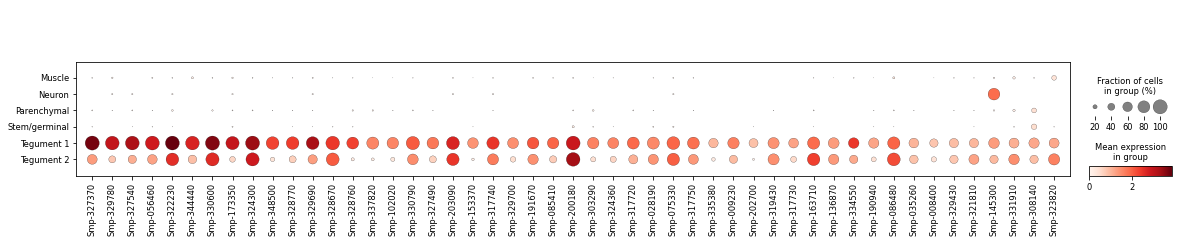

In [21]:
sc.pl.dotplot(samsporoadata, our_teg_genes_list, groupby='ident.names', swap_axes=False, dendrogram=False, save='sporo.seed20.ourTopTegGenes.pdf')

In [21]:
heatmap_genes_list = ['Smp-186930','Smp-027990','Smp-331700','Smp-158750','Smp-033950','Smp-124010','Smp-163140','Smp-138140','Smp-347890','Smp-147640','Smp-134690','Smp-308310']

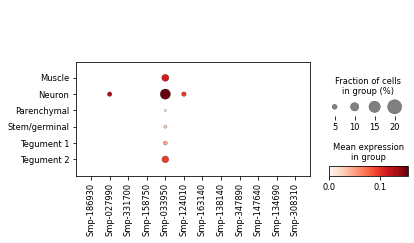

In [22]:
sc.pl.dotplot(samsporoadata, heatmap_genes_list, groupby='ident.names', swap_axes=False, dendrogram=False, save='sporo.seed20.ZL_heatmap.pdf')

In [11]:
sc.pp.calculate_qc_metrics(samsporoadata, percent_top=None, log1p=False, inplace=True)

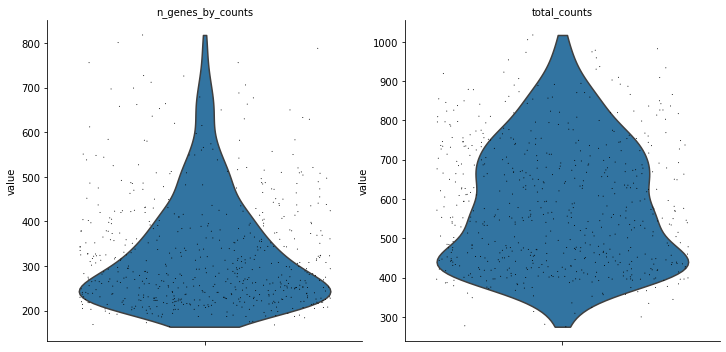

In [12]:
sc.pl.violin(samsporoadata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)